# Laboratorium 1


### Konfiguracja

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as mcoll
import matplotlib.colors as mcolors
import json as js

### Interfejsy

[Dostępne kolory](https://matplotlib.org/3.1.1/gallery/color/named_colors.html)

[Dostępne znaczniki punktów](https://matplotlib.org/3.1.1/api/markers_api.html#module-matplotlib.markers)

In [2]:
class PointsCollection:
    def __init__(self, points = [], color = None, marker = None):
        self.points = np.array(points)
        self.color = color
        self.marker = marker
        
class LinesCollection:
    def __init__(self, lines = [], color = None):
        self.color = color
        self.lines = lines
        
    def add(self, line):
        self.lines.append(line)
        
    def get_collection(self):
        if self.color:
            return mcoll.LineCollection(self.lines, [mcolors.to_rgba(self.color)] * len(lines))
        else:
            return mcoll.LineCollection(self.lines)

class Plot:
    def __init__(self, points=[], lines=[], json = None):
        if json is None:
            self.points = points
            self.lines = lines
        else:
            self.points = [PointsCollection(pointsCol) for pointsCol in js.loads(json)["points"]]
            self.lines = [LinesCollection(linesCol) for linesCol in js.loads(json)["lines"]]
            
    def draw(self):
        plt.close()
        ax = plt.axes()
        for collection in self.points:
            if collection.points.size > 0:
                ax.scatter(*zip(*collection.points), c=collection.color, marker=collection.marker)
        for collection in self.lines:
            ax.add_collection(collection.get_collection())
        ax.autoscale()
        plt.draw()
        
    def toJSON(self):
        return js.dumps({"points": [pointCol.points.tolist() for pointCol in self.points], 
                          "lines":[linesCol.lines for linesCol in self.lines]})

### Przykład użycia

<IPython.core.display.Javascript object>


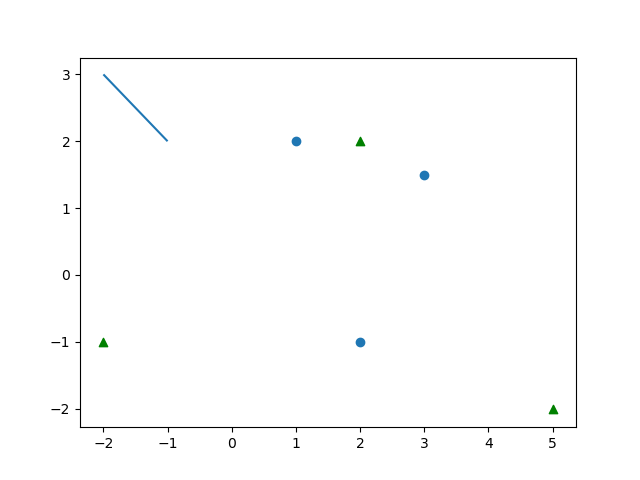

In [3]:
%matplotlib notebook

plot = Plot([PointsCollection([(1, 2), (3, 1.5), (2, -1)]), 
             PointsCollection([(5, -2), (2, 2), (-2, -1)], color = 'green', marker = "^")], 
            [LinesCollection([[(-1,2),(-2,3)]])])
plot.draw()

### Rozwiązanie

In [4]:
%matplotlib notebook



In [5]:
import random
import math
from enum import Enum

class Which_end(Enum):
    LEFT = 1
    RIGHT = 2
    CROSS = 3

class Point:
    def __init__(self, x, y, segment_id, which_end):
        self.x = x
        self.y = y
        self.segment_id = segment_id
        self.which_end = which_end
        
    def __eq__(self, other):
        return self.x==other.x and self.y==other.y

    def __hash__(self):
        return hash(('x', self.x, 'y', self.y))
        
class Segment:
    def __init__(self, p1, p2, segment_id):
        self.p1 = p1
        self.p2 = p2
        self.segment_id = segment_id
        self.A = (p2.y - p1.y) / (p2.x - p1.x)
        self.B = -1
        self.C = p2.y - (((p2.y - p1.y) / (p2.x - p1.x)) * p2.x)
        
    def get_as_tuple_list(self):
        return [(self.p1.x, self.p1.y), (self.p2.x, self.p2.y)]
    
def get_segments_as_tuple_list(segments):
    s = [];
    for i in range(len(segments)):
        s.append(segments[i].get_as_tuple_list())
    return s

def get_points_as_tuple_list(points):
    p = [];
    for i in points:
        p.append((i.x, i.y))
    return p

def get_all_points(segments):
    p = []
    for i in range(len(segments)):
        p.append(segments[i].p1)
        p.append(segments[i].p2)
    return p

def get_filled_Q(segments):
    all_points = get_all_points(segments)
    return sorted(all_points, key=lambda point: point.x)

def get_segment_with_id(id, segments):
    for s in segments:
        if s.segment_id == id: return s

In [6]:
def add_new_segment(x1, y1, x2, y2, segments):
    if x1 == x2:
        print('Podano dwa punkty o takiej samej współrzędnej x.')
        return
    if x1 > x2:
        x1, x2 = x2, x1
        y1, y2 = y2, y1
    segments.append(Segment(Point(x1, y1, len(segments), Which_end.LEFT), \
                            Point(x2, y2, len(segments), Which_end.RIGHT), len(segments)))
    
def add_n_random_segments(n, x_min, y_min, x_max, y_max, segments):
    for i in range(n):
        add_new_segment(random.uniform(x_min, x_max),
                        random.uniform(y_min, y_max),
                        random.uniform(x_min, x_max),
                        random.uniform(y_min, y_max), segments)
    

In [7]:
segments = []
add_new_segment(2, 2, 6, 2, segments)
add_new_segment(4, 1, 7, 7, segments)
add_new_segment(0, 0, 8, 6, segments)
add_new_segment(2, 2.5, 6, 2.5,segments)
add_new_segment(0, 1, 1, 0,segments)
add_new_segment(5, 7, 9, 6.5,segments)
add_new_segment(4, 4, 4.5, 0, segments)
add_new_segment(1, 4, 2, 5, segments)
add_new_segment(1, 5, 4, 6, segments)
add_new_segment(9, 9, 8, 8, segments)
n = 10
x_min = -10
y_min = -10
x_max = 10
y_max = 10
# add_n_random_segments(n, x_min, y_min, x_max, y_max, segments)

T = []
Q = get_filled_Q(segments)

# crossing_points = []
crossing_points = set()
eps = 10**(-10)

while len(Q) != 0:
    p = Q[0]
    Q.pop(0)
    # update T
    if p.which_end == Which_end.LEFT:
        T.append(segments[p.segment_id])
        T = sorted(T, key=lambda segment: segment.A*p.x + segment.C)
    elif p.which_end == Which_end.RIGHT:
        T.remove(segments[p.segment_id])
    elif p.which_end == Which_end.CROSS:
        crossing_points.add(p)
        T = sorted(T, key=lambda segment: segment.A*(p.x + eps) + segment.C)

    # update Q
    for i in range(len(T)):
        if i == 0: continue
        s0 = T[i-1]
        s1 = T[i]

        W = s0.A * s1.B - s1.A * s0.B
        if W == 0: continue
        Wx = (-s0.C) * s1.B - (-s1.C) * s0.B
        Wy = s0.A * (-s1.C) - s1.A * (-s0.C)

        x = Wx / W
        y = Wy / W
    #     print(x,y) # wsp punktu przeciecia prostych
        if x > p.x and x <= s0.p2.x and x <= s1.p2.x:
            Q.append(Point(x, y, (s0.segment_id, s1.segment_id), Which_end.CROSS))
            Q = sorted(Q, key=lambda point: point.x)
            
print('Liczba punktow przeciec:', len(crossing_points))
print('(Punkt przeciecia) X ((wierzcholki odcinka 1), (wierzcholki odcinka 2))')
for cp in crossing_points:
    s0 = get_segment_with_id(cp.segment_id[0], segments)
    s1 = get_segment_with_id(cp.segment_id[1], segments)
    print('(' + "%.2f" % cp.x + ', ' + "%.2f" % cp.y + ') ' + 'X ' + \
         '((' + str(s0.p1.x)+ ', ' + str(s0.p1.y) + '),', '(' + str(s0.p2.x)+ ', ' + str(s0.p1.y) + ')),',
         '((' + str(s1.p1.x)+ ', ' + str(s1.p1.y) + '),', '(' + str(s1.p2.x)+ ', ' + str(s1.p1.y) + '))')


Liczba punktow przeciec: 11
(Punkt przeciecia) X ((wierzcholki odcinka 1), (wierzcholki odcinka 2))
(3.33, 2.50) X ((0, 0), (8, 0)), ((2, 2.5), (6, 2.5))
(6.88, 6.76) X ((4, 1), (7, 1)), ((5, 7), (9, 7))
(4.30, 1.60) X ((4, 1), (7, 1)), ((4, 4), (4.5, 4))
(5.60, 4.20) X ((4, 1), (7, 1)), ((0, 0), (8, 0))
(4.19, 2.50) X ((2, 2.5), (6, 2.5)), ((4, 4), (4.5, 4))
(4.25, 2.00) X ((2, 2), (6, 2)), ((4, 4), (4.5, 4))
(4.50, 2.00) X ((4, 1), (7, 1)), ((2, 2), (6, 2))
(4.75, 2.50) X ((4, 1), (7, 1)), ((2, 2.5), (6, 2.5))
(0.57, 0.43) X ((0, 0), (8, 0)), ((0, 1), (1, 1))
(4.11, 3.09) X ((0, 0), (8, 0)), ((4, 4), (4.5, 4))
(2.67, 2.00) X ((0, 0), (8, 0)), ((2, 2), (6, 2))


<IPython.core.display.Javascript object>


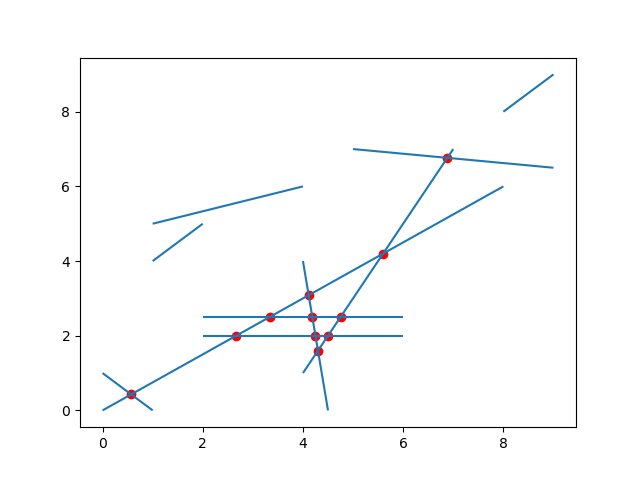

In [8]:
crossing_points_as_tuple_list = get_points_as_tuple_list(crossing_points)
segments_as_tuple_list = get_segments_as_tuple_list(segments)
plot = Plot([PointsCollection(crossing_points_as_tuple_list, color='red')], 
            [LinesCollection(segments_as_tuple_list)])
plot.draw()